In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Shivam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
data = pd.read_excel(r"C:\Users\Shivam\Desktop\ml_prg\dataset\iris.xlsx",names=["sepal_length","sepal_width","petal_length","petal_width","class"])

In [14]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [15]:
y = data['class']
data.drop("class",axis=1,inplace=True)

#### Covariance Matrix

In [17]:
cov_matrix = data.cov()
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.686568,-0.037279,1.270362,0.515347
sepal_width,-0.037279,0.187921,-0.316731,-0.115749
petal_length,1.270362,-0.316731,3.096372,1.289124
petal_width,0.515347,-0.115749,1.289124,0.579566


#### Correlation Matrix

In [18]:
corr_matrix = data.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


#### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns=data.columns)

In [29]:
scaled_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.390542,0.344859,-1.410986,-1.325063
2,-1.511636,0.113399,-1.296943,-1.325063
3,-1.027262,1.270695,-1.353964,-1.325063
4,-0.542889,1.965072,-1.182901,-1.061466


In [166]:
cov_matrix_scaled = scaled_data.cov()
cov_matrix_scaled

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006757,-0.104485,0.877170,0.822491
sepal_width,-0.104485,1.006757,-0.418023,-0.353103
petal_length,0.877170,-0.418023,1.006757,0.968816
petal_width,0.822491,-0.353103,0.968816,1.006757


In [31]:
cov_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.686568,-0.037279,1.270362,0.515347
sepal_width,-0.037279,0.187921,-0.316731,-0.115749
petal_length,1.270362,-0.316731,3.096372,1.289124
petal_width,0.515347,-0.115749,1.289124,0.579566


In [162]:
nor = scaled_data/(scaled_data.std())

In [163]:
nor.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [164]:
nor.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [165]:
scaled_data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


#### Eigen vector and value

In [32]:
eig_val, eig_vector = np.linalg.eig(cov_matrix_scaled)

In [33]:
print("Eigenvalues : \n" + str(eig_val))
print("Eigenvectors : \n" + str(eig_vector))

Eigenvalues : 
[2.92442837 0.93215233 0.14946373 0.02098259]
Eigenvectors : 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]


#### PCA

In [34]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_data)
principal_df = pd.DataFrame(principalComponents,columns=['PC1','PC2'])
principal_df

,PC1,PC2
0,-2.107950,-0.644276
1,-2.387971,-0.305833
2,-2.324879,-0.562923
3,-2.405086,0.687591
4,-2.083204,1.530252
...,...,...
144,1.859771,0.379344
145,1.542004,-0.908086
146,1.509255,0.264606
147,1.369096,1.015839


In [39]:
principal_df['class'] = y
principal_df.head()

,PC1,PC2,class
0,-2.107950,-0.644276,Iris-setosa
1,-2.387971,-0.305833,Iris-setosa
2,-2.324879,-0.562923,Iris-setosa
3,-2.405086,0.687591,Iris-setosa
4,-2.083204,1.530252,Iris-setosa


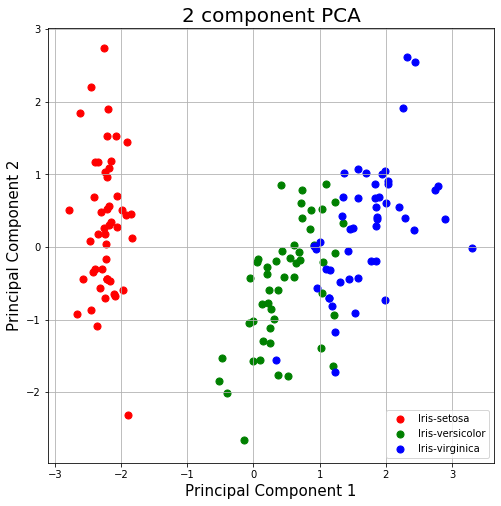

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = principal_df['class'] == target
    ax.scatter(principal_df.loc[indicesToKeep, 'PC1']
               , principal_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [45]:
for i in zip(targets,colors):
    print(i)

('Iris-setosa', 'r')
('Iris-versicolor', 'g')
('Iris-virginica', 'b')


In [49]:
pca.explained_variance_ratio_

array([0.72620033, 0.23147407])

In [52]:
scaled_data

,sepal_length,sepal_width,petal_length,petal_width
0,-1.148356,-0.118060,-1.353964,-1.325063
1,-1.390542,0.344859,-1.410986,-1.325063
2,-1.511636,0.113399,-1.296943,-1.325063
3,-1.027262,1.270695,-1.353964,-1.325063
4,-0.542889,1.965072,-1.182901,-1.061466
...,...,...,...,...
144,1.031326,-0.118060,0.812838,1.442709
145,0.546952,-1.275355,0.698796,0.915514
146,0.789139,-0.118060,0.812838,1.047313
147,0.425859,0.807777,0.926880,1.442709


In [53]:
cov_matrix_scaled

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006757,-0.104485,0.877170,0.822491
sepal_width,-0.104485,1.006757,-0.418023,-0.353103
petal_length,0.877170,-0.418023,1.006757,0.968816
petal_width,0.822491,-0.353103,0.968816,1.006757


#### Eigen vectors and values 

In [55]:
eig_val, eig_vec = np.linalg.eig(cov_matrix_scaled)
print("Eigen vectors : \n"+ str(eig_vec))
print("\n Eigen values : \n" + str(eig_val))

Eigen vectors : 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

 Eigen values : 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [91]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues and vectors in descending order : \n')
for i in eig_pairs:
    print(str(i[0])+" \t "+str(i[1]))

Eigenvalues and vectors in descending order : 

2.9244283691111126 	 [ 0.52308496 -0.25956935  0.58184289  0.56609604]
0.9321523302535072 	 [-0.36956962 -0.92681168 -0.01912775 -0.06381646]
0.14946373489813383 	 [-0.72154279  0.2411952   0.13962963  0.63380158]
0.020982592764270565 	 [ 0.26301409 -0.12437342 -0.80099722  0.52321917]


#### 100 % variance of data is shown by eigen vectors / principal components if all are taken into consideration

In [98]:
(eig_pairs[0][0]/sum(eig_val))*100 + (eig_pairs[1][0]/sum(eig_val))*100 + (eig_pairs[2][0]/sum(eig_val))*100 + (eig_pairs[3][0]/sum(eig_val))*100

100.0

In [106]:
tot = sum(eig_val)
var = [(i / tot)*100 for i in sorted(eig_val, reverse=True)]
cum_var = np.cumsum(var)
print("Variance captured by each component : \n",var)
print("\nCumulative variance captured as we travel each component : \n",cum_var)

Variance captured by each component : 
 [72.62003332692029, 23.147406858644153, 3.711515564584534, 0.5210442498510144]

Cumulative variance captured as we travel each component : 
 [ 72.62003333  95.76744019  99.47895575 100.        ]


The first component itself tells most of the variance - 72% , Principal Component. The second component also shows a good variance when projected of 23% , together they show 95% of variance. The rest 5% is shown by other 2 components which can easily be dropped without much loss in the data.

In [126]:
print("  Eigen Value  \t\t\t\t Eigen Vector")
for i in eig_pairs:
    print(str(i[0])+" \t "+str(i[1]))
W = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
print("\nMatrix W (Principal Components : \n",W)

  Eigen Value  				 Eigen Vector
2.9244283691111126 	 [ 0.52308496 -0.25956935  0.58184289  0.56609604]
0.9321523302535072 	 [-0.36956962 -0.92681168 -0.01912775 -0.06381646]
0.14946373489813383 	 [-0.72154279  0.2411952   0.13962963  0.63380158]
0.020982592764270565 	 [ 0.26301409 -0.12437342 -0.80099722  0.52321917]

Matrix W (Principal Components : 
 [[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [188]:
(eig_val[1]*eig_vec[1]).dot(eig_val[0]*eig_vec[0])

1.2212453270876722e-15

In [211]:
cov_matrix_scaled['sepal_length']['sepal_length']+cov_matrix_scaled['sepal_width']['sepal_width']+cov_matrix_scaled['petal_length']['petal_length']+cov_matrix_scaled['petal_width']['petal_width']

4.027027027027028

In [210]:
cov_matrix['sepal_length']['sepal_length']+cov_matrix['sepal_width']['sepal_width']+cov_matrix['petal_length']['petal_length']+cov_matrix['petal_width']['petal_width']

4.550427172138583

In [214]:
sum(eig_val)

4.0270270270270245

In [203]:
cov_matrix_scaled

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006757,-0.104485,0.877170,0.822491
sepal_width,-0.104485,1.006757,-0.418023,-0.353103
petal_length,0.877170,-0.418023,1.006757,0.968816
petal_width,0.822491,-0.353103,0.968816,1.006757


In [177]:
data.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.686568,-0.037279,1.270362,0.515347
sepal_width,-0.037279,0.187921,-0.316731,-0.115749
petal_length,1.270362,-0.316731,3.096372,1.289124
petal_width,0.515347,-0.115749,1.289124,0.579566


In [276]:
scaled_data.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006757,-0.104485,0.877170,0.822491
sepal_width,-0.104485,1.006757,-0.418023,-0.353103
petal_length,0.877170,-0.418023,1.006757,0.968816
petal_width,0.822491,-0.353103,0.968816,1.006757


In [179]:
nor.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [180]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


#### Project actual points on new space, here 2D plane 

In [132]:
projected_data = scaled_data.dot(W)

In [140]:
projected_data['target'] = y
projected_data.columns = ['PC1','PC2','Target']

In [141]:
projected_data.head()

,PC1,PC2,Target
0,-2.107950,0.644276,Iris-setosa
1,-2.387971,0.305833,Iris-setosa
2,-2.324879,0.562923,Iris-setosa
3,-2.405086,-0.687591,Iris-setosa
4,-2.083204,-1.530252,Iris-setosa


In [216]:
T = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1),eig_pairs[2][1].reshape(4,1),eig_pairs[3][1].reshape(4,1)))

In [217]:
cov_projected_data = scaled_data.dot(T)

In [218]:
cov_projected_data.columns = ['PC1','PC2','PC3','PC4']

In [220]:
cov_projected_data.cov()

,PC1,PC2,PC3,PC4
PC1,2.924428e+00,-5.194935e-16,-4.956555e-16,6.014194e-16
PC2,-5.194935e-16,9.321523e-01,9.185368e-16,1.037279e-16
PC3,-4.956555e-16,9.185368e-16,1.494637e-01,2.305162e-16
PC4,6.014194e-16,1.037279e-16,2.305162e-16,2.098259e-02


In [235]:
(pd.DataFrame(np.random.nbrmal(data),columns=data.columns)).cov()

AttributeError: module 'numpy' has no attribute 'normal'

In [236]:
scaled_data.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.006757,-0.104485,0.877170,0.822491
sepal_width,-0.104485,1.006757,-0.418023,-0.353103
petal_length,0.877170,-0.418023,1.006757,0.968816
petal_width,0.822491,-0.353103,0.968816,1.006757


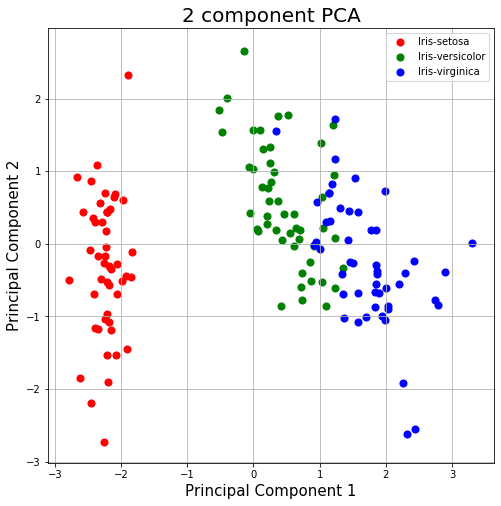

In [142]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = projected_data['Target'] == target
    ax.scatter(projected_data.loc[indicesToKeep, 'PC1']
               , projected_data.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [255]:
arr = np.array([[16,29],[65,234]])

In [256]:
arr = pd.DataFrame(arr,columns=['1','2'])

In [257]:
arr

,1,2
0,16,29
1,65,234


In [258]:
arr.cov()

,1,2
1,1200.5,5022.5
2,5022.5,21012.5


In [259]:
sc = StandardScaler()
arr1 = sc.fit_transform(arr)

In [260]:
arr1 = pd.DataFrame(arr1,columns=arr.columns)

In [261]:
arr1

,1,2
0,-1.0,-1.0
1,1.0,1.0


In [269]:
arr1['2'].mean()

0.0

In [273]:
(arr1/arr1.std()).cov()

,1,2
1,1.0,1.0
2,1.0,1.0
